In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister,\
    ClassicalRegister,transpile, Aer, IBMQ,execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [3]:
def reflection(qc,x):
    '''Performs reflection around state |0>: adds a negative phase only to state |0>'''
    qc.x(x) #apply X to whole register
    qc.h(x[-1])#apply hadamard to last qubit
    qc.mcx(x[:-1],x[-1]) #apply multi control x gate
    qc.h(x[-1])
    qc.x(x)
def diffuser(qc,x):
    '''Transforms superposition state |s> -> |0>, reflects about |0>
    and transforms back to |s> again.'''
    qc.h(x)
    reflection(qc,x)
    qc.h(x)

## 4.1) 2 colours, 4 Nodes

In [4]:
vert = QuantumRegister(4, name ='vert')
edg = QuantumRegister(3, name ='edge')
contr = QuantumRegister(1, name ='control')
cr = ClassicalRegister(2)
qc = QuantumCircuit(vert, edg, contr, cr)

#color coding: 0-> blue, 1-> yellow
#vertices 0 (blue) and 1 (yellow) are known
qc.x(vert[1])
#the rest are unknown: apply H
qc.h(vert[2])
qc.h(vert[3])
#set control qubit in state |->
qc.x(contr)
qc.h(contr)
#apply U_f
#encode edges
#0-3
qc.cx(vert[0],edg[0])
qc.cx(vert[3],edg[0])
#1-2
qc.cx(vert[1],edg[1])
qc.cx(vert[2],edg[1])
#2-3
qc.cx(vert[2],edg[2])
qc.cx(vert[3],edg[2])
#add negative amplitude to the state with all ones (all edges connecting nodes with different colours)
qc.barrier()

qc.mcx(edg,contr)
qc.barrier()

#reverse edge encoding
qc.cx(vert[3],edg[2])
qc.cx(vert[2],edg[2])
qc.cx(vert[2],edg[1])
qc.cx(vert[1],edg[1])
qc.cx(vert[3],edg[0])
qc.cx(vert[0],edg[0])
qc.barrier()

#diffuser
diffuser(qc,vert[2:])
qc.measure(vert[2:],cr)
qc.draw()



░       ░                     »
   vert_0: ───────■────────────────────────────░───────░─────────────────────»
           ┌───┐  │                            ░       ░                     »
   vert_1: ┤ X ├──┼─────────■──────────────────░───────░─────────────────────»
           ├───┤  │         │                  ░       ░                     »
   vert_2: ┤ H ├──┼─────────┼────■────■────────░───────░────────■─────────■──»
           ├───┤  │         │    │    │        ░       ░        │         │  »
   vert_3: ┤ H ├──┼────■────┼────┼────┼────■───░───────░───■────┼────■────┼──»
           └───┘┌─┴─┐┌─┴─┐  │    │    │    │   ░       ░   │    │  ┌─┴─┐  │  »
   edge_0: ─────┤ X ├┤ X ├──┼────┼────┼────┼───░───■───░───┼────┼──┤ X ├──┼──»
                └───┘└───┘┌─┴─┐┌─┴─┐  │    │   ░   │   ░   │    │  └───┘┌─┴─┐»
   edge_1: ───────────────┤ X ├┤ X ├──┼────┼───░───■───░───┼────┼───────┤ X ├»
                          └───┘└───┘┌─┴─┐┌─┴─┐ ░   │   ░ ┌─┴─┐┌─┴─┐     └───┘»
   edge_2: ─────────────────────────┤ X ├┤ X ├─░───■───░─┤ X ├┤ X ├──────────»
           ┌───┐┌───┐               └───┘└───┘ ░ ┌─┴─┐ ░ └───┘└───┘          »
control_0: ┤ X ├┤ H ├──────────────────────────░─┤ X ├─░─────────────────────»
           └───┘└───┘                          ░ └───┘ ░                     »
     c0: 2/══════════════════════════════════════════════════════════════════»
                                                                             »
«                      ░                                          
«   vert_0: ──■────────░──────────────────────────────────────────
«             │        ░                                          
«   vert_1: ──┼────■───░──────────────────────────────────────────
«             │    │   ░ ┌───┐┌───┐          ┌───┐┌───┐     ┌─┐   
«   vert_2: ──┼────┼───░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├───
«             │    │   ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐└╥┘┌─┐
«   vert_3: ──┼────┼───░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫─┤M├
«           ┌─┴─┐  │   ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║ └╥┘
«   edge_0: ┤ X ├──┼───░─────────────────────────────────────╫──╫─
«           └───┘┌─┴─┐ ░                                     ║  ║ 
«   edge_1: ─────┤ X ├─░─────────────────────────────────────╫──╫─
«                └───┘ ░                                     ║  ║ 
«   edge_2: ───────────░─────────────────────────────────────╫──╫─
«                      ░                                     ║  ║ 
«control_0: ───────────░─────────────────────────────────────╫──╫─
«                      ░                                     ║  ║ 
«     c0: 2/═════════════════════════════════════════════════╩══╩═
«                                                            0  1

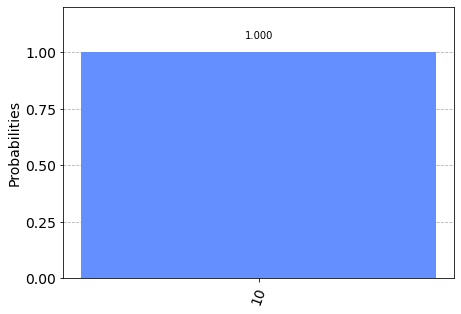

In [5]:
#run on simulator
backend = Aer.get_backend('qasm_simulator') 
result = execute(qc, backend).result()

plot_histogram(result.get_counts())

## 4.1) 4 colours, 7 Nodes

In [5]:
B = 'blue'
Y = 'yellow'
G = 'green'
R = 'red'
col_coding = {B: (0, 0), 
              Y: (0, 1), 
              G: (1, 0), 
              R: (1, 1)}
col_decoding = {v: k for k, v in col_coding.items()}

In [6]:
#7 Nodes 4 Colors
num_totalv = 7
relevant_vertices=[1,2,6]
edge_list = [(1, 0), (1, 2), (1,4), (1, 5),
           (2, 3), (2, 5), (2, 6),
           (6, 5), (6, 3)]
num_e = len(edge_list)
v_col = [(0, R), (3, B), (4, G), (5, Y)]

In [7]:
def build_circuit(num_totalv,relevant_vertices, num_e):
    """num_totalv = number of vertices, num_e = number of edges to consider,
    relevant_vertices = list of blanck vertices"""
    qc = QuantumCircuit()
    vr = [] #vertices registers
    rel_vr = [] #relevant vertices qubits
    for i in range(num_totalv):
        #consider 2 qubits for each vertex, to encode 4 different colours
        tmp = QuantumRegister(2, "v_{}".format(i)) 
        qc.add_register(tmp)
        vr.append(tmp)    
        if i in relevant_vertices:
            rel_vr.append(tmp[0])
            rel_vr.append(tmp[1])
    er = QuantumRegister(num_e, 'edge')  # is 1 when adjacent nodes are different colour
    contr = QuantumRegister(1, 'control')
    cr = ClassicalRegister(len(relevant_vertices)*2, 'result')
    qc.add_register(er)
    qc.add_register(contr)
    qc.add_register(cr)
    
    return qc, vr, rel_vr, er, contr, cr
def init_vertices(qc, vr, v_col,rel_vr):
    """Gets quantum circuit qc, vertex quantum register v_r, and initial vertex colour list v_col.
    Initializes the vertex's colour if given, otherwise applies Hadamard."""
    
    for idx, col in v_col:
        b0, b1 = col_coding[col]
        if b0==1: 
            qc.x(vr[idx][0])
        if b1==1:
            qc.x(vr[idx][1])
    # apply hadamard for the blank/relevant vertices 
    qc.h(rel_vr)

def connect_edges (qc, vr, er, edge_list):
    for i, edge in enumerate(edge_list):
        a,b=min(edge),max(edge)
        #XOR between vertices, for each colour qubit
        qc.cx(vr[a][0],vr[b][0])
        qc.cx(vr[a][1],vr[b][1])
        #apply OR gate (2 CNOTS, 1 toffoli), such that er[i] = 1 if vertices have different colours
        qc.cx(vr[b][0],er[i])
        qc.cx(vr[b][1],er[i])
        qc.ccx(vr[b][0],vr[b][1],er[i])
        #undo XOR to recover original vertex state
        qc.cx(vr[a][1],vr[b][1])
        qc.cx(vr[a][0],vr[b][0])      

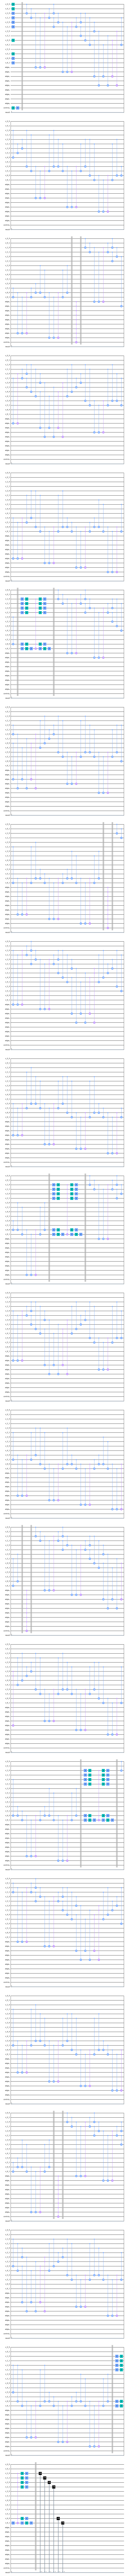

In [8]:
qc, vr, rel_vr, er, contr, cr=build_circuit(num_totalv,relevant_vertices, num_e)
init_vertices(qc, vr, v_col,rel_vr)
#Initialize control in |-> state
qc.x(contr)
qc.h(contr)
qc.barrier()
#optimal number of grover iterations (n=6, N=2^6=64,k=2 (2 possible solutions)): pi/4 sqrt(N/k) -> 4.44...
ngrov_iter = 4
#Grover iteration
for i in range(ngrov_iter):
    #U_f
    connect_edges (qc, vr, er, edge_list)
    qc.barrier()
    qc.mcx(er,contr)
    qc.barrier()
    connect_edges(qc, vr, er, edge_list)
    qc.barrier()
    #D_n
    diffuser(qc,rel_vr)
    qc.barrier()
qc.measure(rel_vr,cr)
qc.draw()


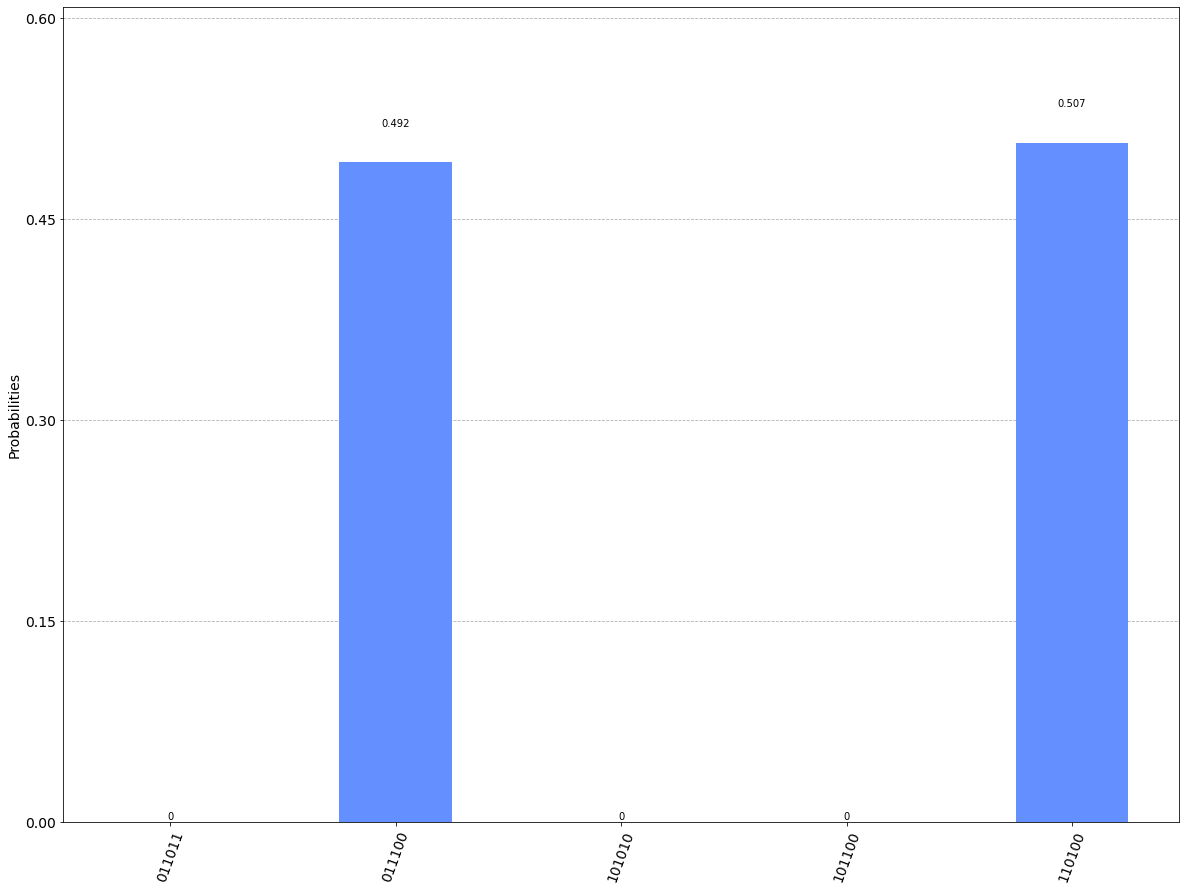

In [9]:
#run on simulator

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=8000).result()
plot_histogram(result.get_counts(), figsize=(20,15))